In [1]:
from vnpy.app.spread_trading.backtesting import BacktestingEngine
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_arbitrage_strategy import (
    BmArbitrageStrategy
)

from vnpy.app.spread_trading.strategies.basic_spread_strategy import (
    BasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_spread_strategy import (
    BmBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_statistical_arbitrage_strategy import (
    SpreadStatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_multi_basic_spread_strategy import (
    BmMultiBasicSpreadStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime

In [2]:
spread = SpreadData(
    name="BM",
    legs=[LegData("XBTH20.BITMEX"), LegData("XBTZ19.BITMEX")],
    price_multipliers={"XBTZ19.BITMEX": -1, "XBTH20.BITMEX": 1},
    trading_multipliers={"XBTZ19.BITMEX": -1, "XBTH20.BITMEX": 1},
    active_symbol="XBTH20.BITMEX",
    inverse_contracts={"XBTH20.BITMEX": False, "XBTZ19.BITMEX": False},
    min_volume=1
)

In [3]:
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019, 9, 14),
    end=datetime(2019, 11, 20),
    rate=0.00075,
    slippage=0.001,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
    
)
# engine.add_strategy(StatisticalArbitrageStrategy, {})
engine.add_strategy(SpreadStatisticalArbitrageStrategy, {}) #添加boll 差价 判读开仓

# engine.add_strategy(BmArbitrageStrategy, {})
# engine.add_strategy(BasicSpreadStrategy , {})
# engine.add_strategy(BmBasicSpreadStrategy, {}) # 只远期开空，近期开多 符合平仓条件后，平空 平多
# engine.add_strategy(BmMultiBasicSpreadStrategy, {}) # 主动腿多空循环开仓



2019-11-25 17:36:11.945471	开始加载历史数据
2019-11-25 17:36:29.758495	历史数据加载完成，数据量：96481
2019-11-25 17:36:29.955128	策略初始化完成
2019-11-25 17:36:29.955221	开始回放历史数据
2019-11-25 17:36:31.141721	历史数据回放结束
2019-11-25 17:36:31.142022	开始计算逐日盯市盈亏
2019-11-25 17:36:31.144047	逐日盯市盈亏计算完成
2019-11-25 17:36:31.144315	开始计算策略统计指标
2019-11-25 17:36:31.156108	------------------------------
2019-11-25 17:36:31.156377	首个交易日：	2019-09-24
2019-11-25 17:36:31.156394	最后交易日：	2019-11-20
2019-11-25 17:36:31.156412	总交易日：	58
2019-11-25 17:36:31.156424	盈利交易日：	30
2019-11-25 17:36:31.156434	亏损交易日：	28
2019-11-25 17:36:31.156450	起始资金：	1,000,000.00
2019-11-25 17:36:31.156463	结束资金：	1,677,349.30
2019-11-25 17:36:31.156478	总收益率：	67.73%
2019-11-25 17:36:31.156492	年化收益：	280.28%
2019-11-25 17:36:31.157211	最大回撤: 	-165,000.00
2019-11-25 17:36:31.157226	百分比最大回撤: -10.64%
2019-11-25 17:36:31.157236	最长回撤天数: 	26
2019-11-25 17:36:31.157247	总盈亏：	677,349.30
2019-11-25 17:36:31.157456	总手续费：	1,235.70
2019-11-25 17:36:31.157479	总滑点：	15.00
2019-11-25 17:

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:290: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


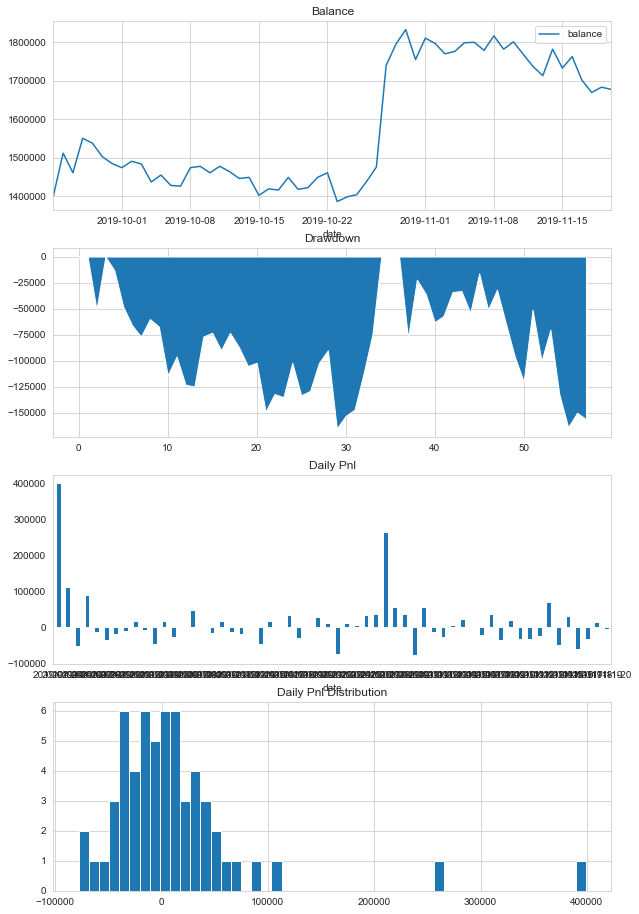

In [4]:
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade)

TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='1', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=159.6, volume=10, time='00:18:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='7', tradeid='2', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=26.4, volume=10, time='20:30:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='11', tradeid='3', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=57.6, volume=10, time='04:47:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='12', tradeid='4', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=148.0, volume=10, time='22:11:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='13', tradeid='5', direction=<Direction.SHORT: '空'>